In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, add, GlobalAveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from skimage import io
import matplotlib.pyplot as plt, numpy as np

from tensorflow.keras.utils import image_dataset_from_directory

from skimage import io, transform, color, exposure, img_as_float
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# We use these code for data augmentation and download the augmented images manually and add them to the dataset folder.



#for image augmentation for boa-constrictor

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import glob
from skimage.io import imread
import pandas as pd, numpy as np
from skimage.color import gray2rgb
from skimage import io
import matplotlib.pyplot as plt
import cv2



fol = glob.glob('/content/real_boa/*.*')

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
for i in fol[0:105]:
    
    img = load_img(i)

    x = img_to_array(img)

    x = x.reshape((1,)+x.shape)

    for batch in datagen.flow(x,batch_size = 1,save_to_dir='aug_boa',save_prefix ='n01742172', save_format ='JPEG'):
      break

fol = glob.glob('/content/aug_boa/*.*')
count = 0
for i in fol:
  imgs = cv2.imread(i, cv2.IMREAD_COLOR)
  cv2.imwrite('/content/aug_boa_f/n01742172_'+str(count+501)+'.JPEG',imgs)
  count+=1
  


!zip -r /content/aug_boa_final.zip /content/aug_boa_f

from google.colab import files
files.download("/content/aug_boa_final.zip") 







#for image augmentation for bullfrog


fol = glob.glob('/content/real_bf/*.*')

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
for i in fol:
    
    img = load_img(i)

    x = img_to_array(img)

    x = x.reshape((1,)+x.shape)

    for batch in datagen.flow(x,batch_size = 1,save_to_dir='aug_bf',save_prefix ='n01742172', save_format ='JPEG'):
      break

fol = glob.glob('/content/aug_bf/*.*')
count = 0
for i in fol:
  imgs = cv2.imread(i, cv2.IMREAD_COLOR)
  cv2.imwrite('/content/aug_bf_f/n01641577_'+str(count+501)+'.JPEG',imgs)
  count+=1
  


!zip -r /content/aug_bf_final.zip /content/aug_bf_f

from google.colab import files
files.download("/content/aug_bf_final.zip") 

In [3]:
#load the datasets [balanced dataset]


train = image_dataset_from_directory(
    "/content/gdrive/MyDrive/cse428_project/dataset/balanced_augmented/train",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=50,
    image_size=(64, 64),
    shuffle=True,
    seed=100,
    validation_split=0.10, 
    subset = "training"
   )

validation = image_dataset_from_directory(
    "/content/gdrive/MyDrive/cse428_project/dataset/balanced_augmented/train",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=50,
    image_size=(64, 64),
    shuffle=True,
    seed=100,
    validation_split=0.10, 
    subset = "validation")

test = image_dataset_from_directory(
    "/content/gdrive/MyDrive/cse428_project/dataset/balanced_augmented/test",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=50,
    image_size=(64, 64),
    shuffle=True,
    seed=100)

Found 2500 files belonging to 5 classes.
Using 2250 files for training.
Found 2500 files belonging to 5 classes.
Using 250 files for validation.
Found 250 files belonging to 5 classes.


In [17]:
# model

from tensorflow.keras.layers import Rescaling


inputs = Input(shape=(64, 64, 3), name="img")
x = Rescaling(1./255)(inputs)

x = Conv2D(64, 3, strides=(2, 2), activation='relu')(x)
r1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

x = Conv2D(64, 3, strides=(1, 1), padding='same', activation='relu')(r1)
x = Conv2D(64, 3, strides=(1, 1), padding='same', activation='relu')(x)
r2 = add([x, r1])

x = Conv2D(64, 3, strides=(1, 1), padding='same', activation='relu')(r2)
x = Conv2D(64, 3, strides=(1, 1), padding='same', activation='relu')(x)
r3 = add([x, r2])

x = Conv2D(64, 3, strides=(1, 1), padding='same', activation='relu')(r3)
x = Conv2D(64, 3, strides=(1, 1), padding='same', activation='relu')(x)
r4 = add([x, r3])

x = Conv2D(64, 3, strides=(1, 1), padding='same', activation='relu')(r4)
x = Conv2D(64, 3, strides=(1, 1), padding='same', activation='relu')(x)
r5 = add([x, r4])


x = Conv2D(64, 3, strides=(1, 1), padding='same', activation='relu')(r5)
x = Conv2D(64, 3, strides=(1, 1), padding='same', activation='relu')(x)

x = add([x, r5])

x = GlobalAveragePooling2D()(x)

x = Dense(1000, activation='relu')(x)

outputs = Dense(5, activation="softmax")(x)

model = Model(inputs, outputs, name="group1_milestone3")
model.summary()


Model: "group1_milestone3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 rescaling_1 (Rescaling)        (None, 64, 64, 3)    0           ['img[0][0]']                    
                                                                                                  
 conv2d_11 (Conv2D)             (None, 31, 31, 64)   1792        ['rescaling_1[0][0]']            
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 15, 15, 64)  0           ['conv2d_11[0][0]']              
                                                                                  

In [18]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
hist = model.fit(train, epochs=300, validation_data=validation, verbose=1)

Epoch 1/300
45/45 [==============================] - 4s 62ms/step - loss: 1.6080 - accuracy: 0.1964 - val_loss: 1.6030 - val_accuracy: 0.2600
Epoch 2/300
45/45 [==============================] - 3s 57ms/step - loss: 1.6032 - accuracy: 0.2267 - val_loss: 1.5975 - val_accuracy: 0.2960
Epoch 3/300
45/45 [==============================] - 3s 57ms/step - loss: 1.5997 - accuracy: 0.2796 - val_loss: 1.5934 - val_accuracy: 0.3040
Epoch 4/300
45/45 [==============================] - 3s 58ms/step - loss: 1.5947 - accuracy: 0.2760 - val_loss: 1.5864 - val_accuracy: 0.3040
Epoch 5/300
45/45 [==============================] - 3s 57ms/step - loss: 1.5875 - accuracy: 0.3142 - val_loss: 1.5788 - val_accuracy: 0.3920
Epoch 6/300
45/45 [==============================] - 3s 57ms/step - loss: 1.5732 - accuracy: 0.3267 - val_loss: 1.5618 - val_accuracy: 0.3000
Epoch 7/300
45/45 [==============================] - 3s 57ms/step - loss: 1.5472 - accuracy: 0.3391 - val_loss: 1.5239 - val_accuracy: 0.3600
Epoch 

In [20]:
loss_test, pred_test = model.evaluate(test)
print("Testing accuracy (%) =", pred_test*100)


5/5 [==============================] - 0s 9ms/step - loss: 1.0841 - accuracy: 0.7240
Testing accuracy (%) = 72.39999771118164


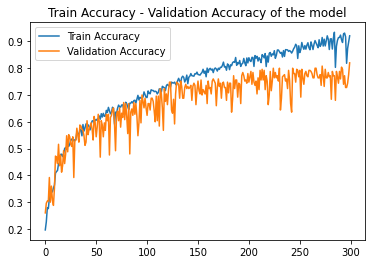

In [21]:
plt.figure()
plt.plot(hist.history["accuracy"],label='Train Accuracy')
plt.plot(hist.history["val_accuracy"],label='Validation Accuracy')
plt.title('Train Accuracy - Validation Accuracy of the model')


plt.legend(loc='best')
plt.show()

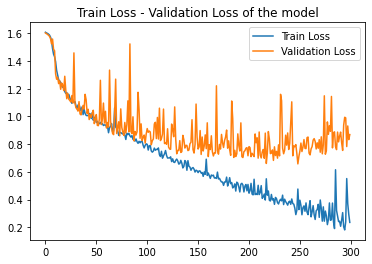

In [22]:
plt.figure()
plt.plot(hist.history["loss"],label='Train Loss')
plt.plot(hist.history["val_loss"],label='Validation Loss')
plt.title('Train Loss - Validation Loss of the model')


plt.legend(loc='best')
plt.show()

In [23]:

def calculations(cm_test,classes):



  cal_d_test = {}
  for i in range(len(classes)):
    cal_d_test[classes[i]] = []
    TP = cm_test[i][i]
    FN = 0
    FP = 0
    TN = 0

    for j in cm_test[i]:
      FN+=j
    FN = FN - TP
  
    for j in range(len(classes)):
      FP += cm_test[j][i]
    FP = FP - TP

    for x in range(len(classes)):
      for y in range(len(classes)):
        TN += cm_test[x][y]
    TN = TN - TP - FN - FP


    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    ppv = TP/(TP+FP)
    npv = TN/(TN+FN)
    f1 = 2*(ppv*sensitivity)/(ppv+sensitivity)
    cal_d_test[classes[i]].append(sensitivity)
    cal_d_test[classes[i]].append(specificity)
    cal_d_test[classes[i]].append(ppv)
    cal_d_test[classes[i]].append(npv)
    cal_d_test[classes[i]].append(f1)

  return cal_d_test

In [24]:
y_pred = model.predict(test)
y_predict = np.argmax(y_pred, axis=1)

5/5 [==============================] - 1s 7ms/step


In [25]:
y_ac = np.concatenate([y for x, y in test], axis=0)
y_actual= np.argmax(y_ac, axis=1)

In [26]:
cls = ['bear', 'boa-constrictor', 'bullfrog', 'golden-retriever', 'goldfish']
cm_model = confusion_matrix(y_actual, y_predict)
d_model = calculations(cm_model,cls)

Testing accuracy (%) model (balanced dataset)= 72.39999771118164
           
Class: bear, Sensitivity: 0.22, Specificity: 0.79, PPV: 0.20754716981132076, NPV :0.8020304568527918, F1:0.21359223300970873
Class: boa-constrictor, Sensitivity: 0.16, Specificity: 0.86, PPV: 0.2222222222222222, NPV :0.8037383177570093, F1:0.18604651162790697
Class: bullfrog, Sensitivity: 0.16, Specificity: 0.775, PPV: 0.1509433962264151, NPV :0.7868020304568528, F1:0.1553398058252427
Class: golden-retriever, Sensitivity: 0.28, Specificity: 0.785, PPV: 0.24561403508771928, NPV :0.8134715025906736, F1:0.2616822429906542
Class: goldfish, Sensitivity: 0.2, Specificity: 0.795, PPV: 0.19607843137254902, NPV :0.7989949748743719, F1:0.198019801980198
   


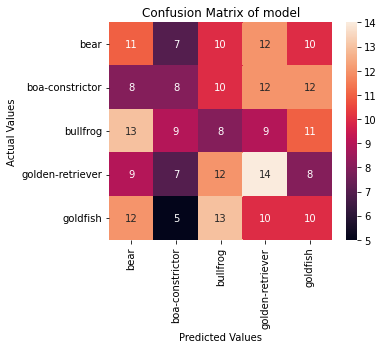

In [27]:
print("Testing accuracy (%) model (balanced dataset)=", pred_test*100)

print('           ')

for k,v in d_model.items():
  print(f'Class: {k}, Sensitivity: {v[0]}, Specificity: {v[1]}, PPV: {v[2]}, NPV :{v[3]}, F1:{v[4]}')

print('   ')

#Plotting the confusion matrix for NN
cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of model')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print('   ')